# Homework: numerical methods
PHYS300
made by: Alfaifi, Ammar
201855360

In [1]:
# import needed packages
import numpy as np
from scipy.constants import g
from scipy.optimize import root
import pandas as pd

# graph settings
import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline
plt.rcParams['figure.figsize'] = [10, 5]
plt.style.use('seaborn')
backend_inline.set_matplotlib_formats('png', 'pdf')


# Range of a Projectile Under Air Drag
For a projectile with resistance, we start with these initial conditions
$$ x(t=0)=y(t=0)=0 $$
$$ \dot{x}(t=0)= v_0cos{\theta} \equiv U $$
$$ \dot{y}(t=0)= v_0sin{\theta} \equiv V $$

Then using $\vec{F}=m\vec{a}$ for each dimension we get
$$ m\ddot{x}=-km\dot{x} $$
$$ m\ddot{y}=-km\dot{y} $$

Putting $y=0$ we get the following equation, after defining $T\equiv kt$
$$T=(K+2)(1-e^{-T})$$
Then the range will be $R\equiv x(T)$, with $K \equiv kV/g$, and $R_0 = 2UV/g$
$$\frac{R}{R_0} = \frac{T}{2K(K+1)}$$

We need to find the value of $T$, and then substitute it back in the range equation


## Check that $k \to 0$ leads to $R \to R_0$
Rewrite 

## Plot $R/R_0$ vs. K

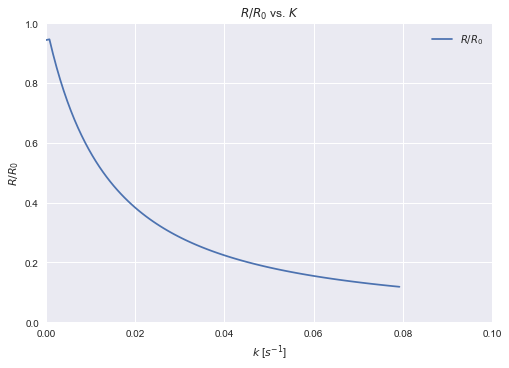

In [2]:
# define initial constants
angle = np.radians(60)
v0 = 600.0 # speed 
U = v0 * np.cos(angle) # x-axis speed
V = v0 * np.sin(angle) # y-axis speed
R0 = 2* U * V / g # range

eps = 1e-9 # cannot be zero
k = np.arange(eps, 0.08, 0.08/100)

def T(k, t):
    return k * t

def K(k):
    return k * V / g

# time equation = 0
def time(t, k):
    return (K(k)+1) * (1 - np.exp(-T(k, t))) - T(k, t)

# range equation
def range_(k, t):
    return T(k, t) / (2 * K(k) * (K(k)+1))

# apprximate T value for each k value
time_res = [root(time, args=(k_), x0=100)['x'][0] for k_ in k]
# find range R values
range_res = [range_(k_, t_) for k_, t_ in zip(k, time_res)]
    
plt.plot(k, range_res, label='$R/R_0$')
plt.xlim(0, 0.1)
plt.ylim(0, 1)
plt.legend()
plt.xlabel('$k$ [$s^{-1}$]')
plt.ylabel('$R/R_0$')
plt.title('$R/R_0$ vs. $K$')
plt.grid(True)
plt.show()

## Check that when the limit $k\to 0$, $R/R_0\to 1$
We use here the same calculation as before but with very small values of $k$.

In [3]:
k = np.arange(1e-10, 0.01, 1/1000)
t = np.arange(0, 150)

def f(t, k):
    return (K(k)+1) * (1 - np.exp(-T(k, t)))

# apprximate T value for each k value
time_res = []
for k_ in k:
    res  = root(time, args=(k_), x0=105.8)
    if res['success']:
        time_res.append(res['x'][0])
    else: print(res)
# find range R values
range_res = [range_(k_, t_) for k_, t_ in zip(k, time_res)]

pd.DataFrame({'k': k, 'Range': range_res})

,k,Range
0,1.000000e-10,0.998377
1,1.000000e-03,0.933477
2,2.000000e-03,0.874337
3,3.000000e-03,0.821468
4,4.000000e-03,0.773966
5,5.000000e-03,0.731089
6,6.000000e-03,0.692224
7,7.000000e-03,0.656857
8,8.000000e-03,0.624557
9,9.000000e-03,0.594962


From the previous table we can deduce that as the drag constant $k \to 0$, then $R/R_0 \to 1$ or $R \to R_0$, which as expected.

# Quadratic Drag Force
For a particle of mass $m$ vertically thrown upward with initial speed $v_0$. The air resistance experienced by the particle is propotional to $v^2$; $f_R = -\alpha v^2$. We have the DE 
$$ m \dot{v} = -mg - \alpha v^2 $$
The initial conditions are $t_0=0$, $y(t_0)=0$, and $v(t_0)\equiv v_0$.
## Velocity

Factor $-mg$ from the RHS of the eq, we get
$$ m \dot{v} = -mg (1+ \frac{\alpha}{mg}v^2) $$

We define the *terminal velocity* as $v_t \equiv \sqrt{mg/\alpha}$
then we get
$$ \frac{dv}{dt} = -g (1+ \frac{v^2}{v_t^2}) $$
rearranging and setting integrals, 
$$ \int_{v_0}^v \frac{dv}{1+ \frac{v^2}{v_t^2}} = -g \int_{t_0}^{t} dt $$
$$ v_t ( \tan^{-1}{\frac{v}{v_t}} - \tan^{-1}{\frac{v_0}{v_t}} )  =  - gt $$
Taking the $tangent$ of both sides
$$ v  = v_t \tan{(\tan^{-1}{\frac{v_0}{v_t}} - gt/v_t)} $$
We define the *characteristic time* $\tau \equiv v_t/ g$
$$ v  = v_t \tan{\left(\tan^{-1}{\frac{v_0}{v_t}} - \frac{t}{\tau}\right)} $$

## Peak Time
To find the time needed to reach the trajectory peak $t_p$, we set $v=0$, and take the arctangent of both sides
$$ t_p  = \tau\tan^{-1}{\frac{v_0}{v_t}} $$

## Height
Now we find the $H(t) = y$
$$ y = \int_{y_0}^{y} dy = v_t \int_{t_0}^t \tan{\left(\tan^{-1}{\frac{v_0}{v_t}} - \frac{t}{\tau}\right)} dt$$

$$ y = -v_t \tau \ln(cos(\tan^{-1}{\frac{v_0}{v_t}})) $$


## Plot $H(\alpha)$
Let us set up the code to graph the function $y$ vs $\alpha$

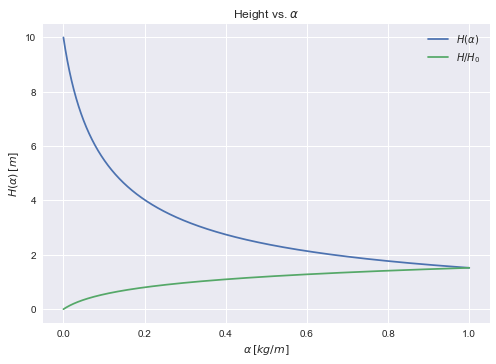

In [8]:
# define constants
mass = 1
v0 = 14
alphas = np.arange(1e-10, 1, 1e-5)

# define terminal velocity
def vt(alpha, m=mass):
    return np.sqrt(m * g / alpha)
# define characteristic time
def tau(vt):
    # return np.sqrt(m / (alpha*g))
    return vt / g
# define the height
def y(alpha):
    return - mass / alpha * np.log(np.cos(np.arctan(v0 / vt(alpha))))
def y2(alpha):
    return -  np.log(np.cos(np.arctan(v0 / vt(alpha))))

plt.plot(alphas, y(alphas), label=r'$H(\alpha)$')
plt.plot(alphas, y2(alphas), label=r'$H/H_0$')
plt.legend()
plt.xlabel(r'$\alpha\, [kg/m]$')
plt.ylabel(r'$H(\alpha)\, [m]$')
plt.title(r'Height vs. $\alpha$')
plt.show()

In [5]:
alphas = np.arange(1e-16, 1e-5, 1e-6)
height_res = [y(a) for a in alphas]

pd.DataFrame({'alpha': alphas, 'Height': height_res})

,alpha,Height
0,1.000000e-16,9.992007
1,1.000000e-06,9.993119
2,2.000000e-06,9.993019
3,3.000000e-06,9.992919
4,4.000000e-06,9.992819
5,5.000000e-06,9.992720
6,6.000000e-06,9.992620
7,7.000000e-06,9.992520
8,8.000000e-06,9.992420
9,9.000000e-06,9.992320


## Without resistance
Let us consider the case when $\alpha \to 0$.
From the previous table we see theat the object do approaches the height $10m$, for no effect of air drag.